# Multiple Plots

Sometimes, you will want to create several plots together as they contained related data. In this notebook, we'll look at how to produce a group of plots and some basic commands to customise them.

## Subplots

Matplotlib allows you to do so via the ```plt.subplots``` command. If this is given two arguments, these will specify the number of rows and columns of the subplots respectively. This command will return references to the figure as a whole and each set of axes. Specifically, these values will be returned as a tuple with two values. The first is the reference to the figure as a whole. The second is a Numpy array with the same shape as the subfigures

Type of a:  <class 'tuple'>
Length of a:  2
Type of a[0]:  <class 'matplotlib.figure.Figure'>
Type of a[1]:  <class 'numpy.ndarray'>
Shape of a[1]:  (3, 2)
Type of a[1][0,0] and a[1][2,1]:  <class 'matplotlib.axes._axes.Axes'> <class 'matplotlib.axes._axes.Axes'>


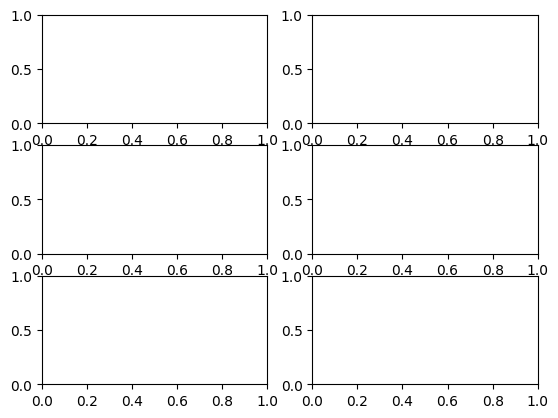

In [1]:
import matplotlib.pyplot as plt

# Create a plot with three rows and two columns of subfigures
a = plt.subplots(3,2)

# Print the type of the returned data
print("Type of a: ", type(a))
# Print the length of the returned tuple
print("Length of a: ", len(a))
# Print the type of the first entry of the returned value
print("Type of a[0]: ", type(a[0]))
# Print the type of the second entry of the returned value
print("Type of a[1]: ", type(a[1]))
# Print the shape of the Numpy array returned as the second entry
print("Shape of a[1]: ", (a[1].shape))
# Print the types of the data representing the top left and bottom right subplots
print("Type of a[1][0,0] and a[1][2,1]: ",  type(a[1][0,0]), type(a[1][2,1]))

We can use tuple assignment to obtain a reference to the figure and to each of the axes. It's conventional to store these references in variables named ```fig``` and ```axs```. We can then plot in each of those sets of axes independently. These subplots are, by default, entirely separate and can have different formatting, types etc.

We can add a title to the group of plots using the command ```fig.suptitle()```, providing the desired title as a string argument.

Sometimes, by default, axis labels, etc may be hidden by other subplots. Correct spacing can be enforced by using ```fig.tight_layout()```. However, if setting a ```suptitle```, this won't be taken into account by ```tight_layout```. This can cause the title to overlap the plots. To get around this, we can use the fact that we can specify the part of the figure that ```tight_layout``` can work with by specify the ```rect``` optional argument. This should be a sequence of four values which specify the left extent, bottom extent, right extent and top extent as a value between 0 and 1. So, if we wanted to constrain the ```tight_layout``` to only use the left half of the figure and not the bottom 10% (for some reason) we might use the sequence ```[0, 0.1, 0.5, 1]```.

As we may be placing several adjacent plots into the same row, it can also be useful to manually specify the height and width of the figure so the subplots have the desired aspect ratio. This can be achieved by specifying the optional argument ```figsize``` to the ```plt.subplots``` command and providing a tuple with two values. The first specifies the width, the second specifies the height.

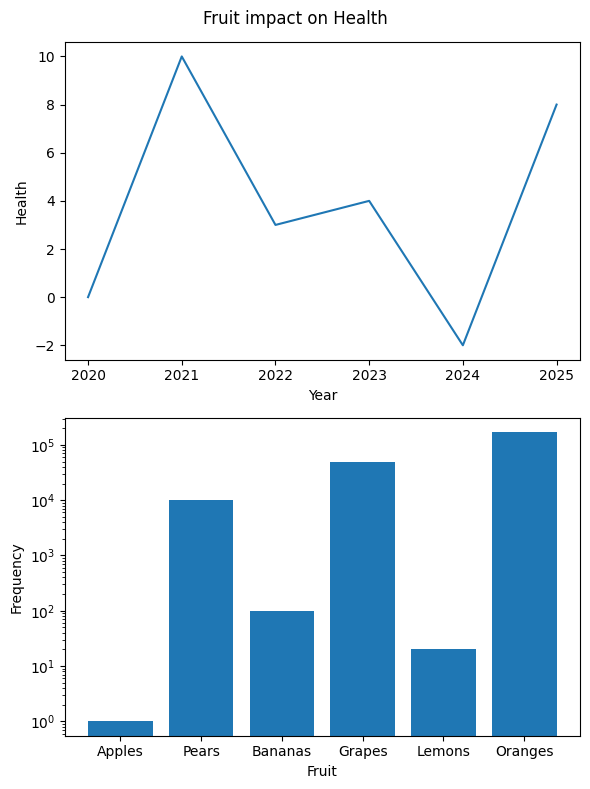

In [19]:
import matplotlib.pyplot as plt

# Health data, by year (top plot)
x1 = [2020, 2021, 2022, 2023, 2024, 2025]
y1 = [0, 10, 3, 4, -2, 8]

# Fruit data, by frequency (bottom plot)
x2 = ["Apples", "Pears", "Bananas", "Grapes", "Lemons", "Oranges"]
y2 = [1, 10000, 100, 50000, 20, 167896]

# TODO: Create a set of subplots with two rows and one column
# The Numpy array containing the references to the sets of axes will be 1 dimensional as the subplots only extend in one dimension
# The size is specified such that the height is slightly larger than the width so the plots aren't squashed vertically
fig, axs = plt.subplots(2,1, figsize=(6,8))

# TODO: Create the top plot
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Health")
axs[0].plot(x1,y1)



# TODO: Create the bottom plot
axs[1].set_xlabel("Fruit")
axs[1].set_ylabel("Frequency")
axs[1].bar(x2,y2,log=True)




# TODO: give a title to the figures
fig.suptitle("Fruit impact on Health")

# TODO: Edit the spacing such that the figures are adequately spaced
# Set the rect argument to constrain the subplots to the lowest 95% of the figure so it doesn't overlap the suptitle
fig.tight_layout()

## Shared Axes

It's possible to cause subplots in the same figure to share their axis values. For example, sharing y-axis values would mean that, if the value of 10 is halfway up the y-axis of one, 10 will be halfway up the axis of all subfigures with the same axis.

This can be achieved when using the ```plt.subplots``` command and setting either or both of the ```sharex``` (for the x-axis) and ```sharey``` (for the y-axis) optional arguments. The options for these values are:

* ```"all"``` or ```True```: Every subplot shares the specified axis,
* ```"none"``` or ```False```: Every suplot is independent (this is the default if ```sharex```/```sharey``` are not explicitly specified),
* ```"row"```: suplots in the same row will share the specified axis,
* ```"col"```: subplots in the same column will share the specified axis.

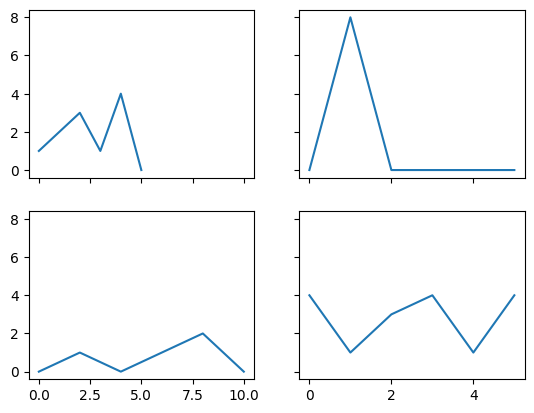

In [20]:
import matplotlib.pyplot as plt

# Create a 2x2 array of subplots
# Cause subplots in the same column to share the same axis by setting the optional argument sharex
# Cause all subplots to share a y-axis
fig, axs = plt.subplots(2, 2, sharex='col', sharey='all')

# Create the top-left plot
x1 = [0, 1, 2, 3, 4, 5]
y1 = [1, 2, 3, 1, 4, 0]
axs[0,0].plot(x1, y1)

# Create the top-right plot
x2 = [0, 1, 2, 3, 4, 5]
y2 = [0, 8, 0, 0, 0, 0]
axs[0,1].plot(x2, y2)

# Create the bottom-left plot
x3 = [0, 2, 4, 6, 8, 10]
y3 = [0, 1, 0, 1, 2, 0]
axs[1,0].plot(x3, y3)

# Create the bottom-right plot
x4 = [0, 1, 2, 3, 4, 5]
y4 = [4, 1, 3, 4, 1, 4]
axs[1,1].plot(x4, y4)

## Adding Subplots

Sometimes it can be useful to create a figure with no subplots and add them one by one. This can allow the addition of different types of plots (e.g. a mix of 2D and 3D axes). There is an opportunity to explore 3D Plots in the extension notebook `PLTX`.

Firstly, we can create a figure using the ```plt.figure``` command. Initially, there are no axes present. We can then add subplots to this figure using the ```fig.add_subplot``` command ([manual page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)). There are a couple of ways we can specify the location of the subplot. The most common is to specify three arguments. The first is the number of rows of subplots, the second is the number of columns of subplots. The third is the number of the subplot, counting from left to right, then top to bottom (beginning at 1). So, to insert a subplot at the top-right of a grid of suplots with three rows and two columns we would use the arguments ```3,2,2```. To insert a subplot at the bottom left of the same grid, we would use ```3,2,5```.

The ```fig.add_subplot``` command allows a few details of the plot to be defined, including the projection type using the optional argument ```projection```.

Text(0.5, 0.92, '3D')

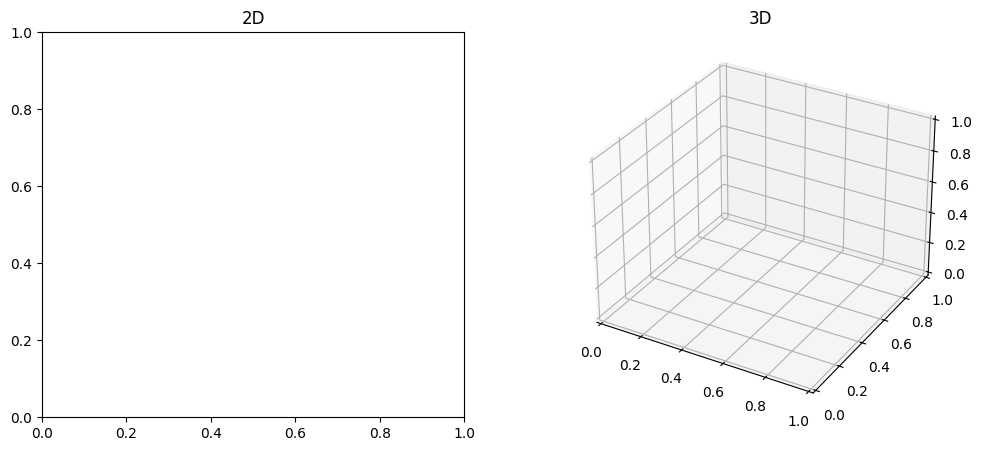

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # This import is required for the 3D projection to work properly with the add_subplots command

# Create an empty collection of subplots
fig = plt.figure(figsize=(12,5))

# Create a 2D subplot on the left
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_title("2D")

# Add a 3D subplot on the right
ax_2 = fig.add_subplot(1, 2, 2, projection='3d')
ax_2.set_title("3D")

## Exercise: Programming Experience

A survey of postgraduate students has been carried out at Imperial. The students were asked what language they programmed in most and how they would categorise their level of experience with these languages. The results are presented below:

| Most-used language | Number of Students |
|-|-|
| Python | 152 |
| R | 89 |
| Matlab | 66 |
| C++ | 47 |
| C | 30 |
| Java | 22 |
| Fortran | 15 |

<br>

| Level of Expertise | Number of Students |
|-|-|
| Novice | 108 |
| Intermediate | 188 |
| Advanced | 125 |

In the code cell below, produce a figure containing two side-by-side subplots displaying this data as a pair of bar charts. Set the y-axes to be shared and appropriately label the figure and axes.

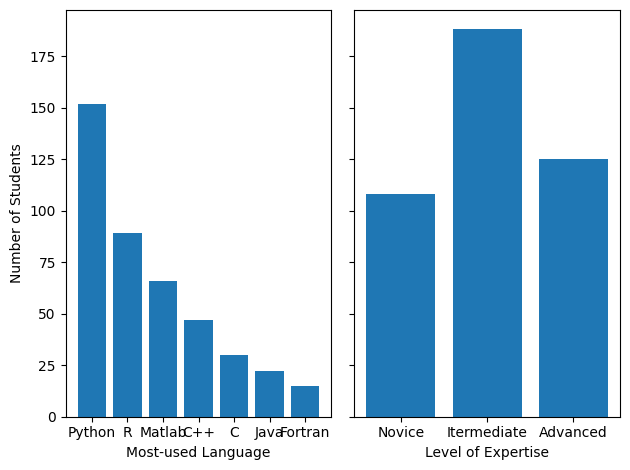

In [34]:
import matplotlib.pyplot as plt

lang = ["Python", "R", "Matlab", "C++", "C", "Java", "Fortran"]
stu_lang = [152, 89, 66, 47, 30, 22, 15]

exp = ["Novice", "Itermediate", "Advanced"]
stu_exp = [108, 188, 125]

fig, axs = plt.subplots(1,2, sharey="row")

axs[0].set_xlabel("Most-used Language")
axs[0].set_ylabel("Number of Students")
axs[0].bar(lang, stu_lang)

axs[1].set_xlabel("Level of Expertise")
axs[1].bar(exp, stu_exp)

fig.tight_layout()
